In [3]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

Number of bands: 5
Image dimensions: 1600 x 1300


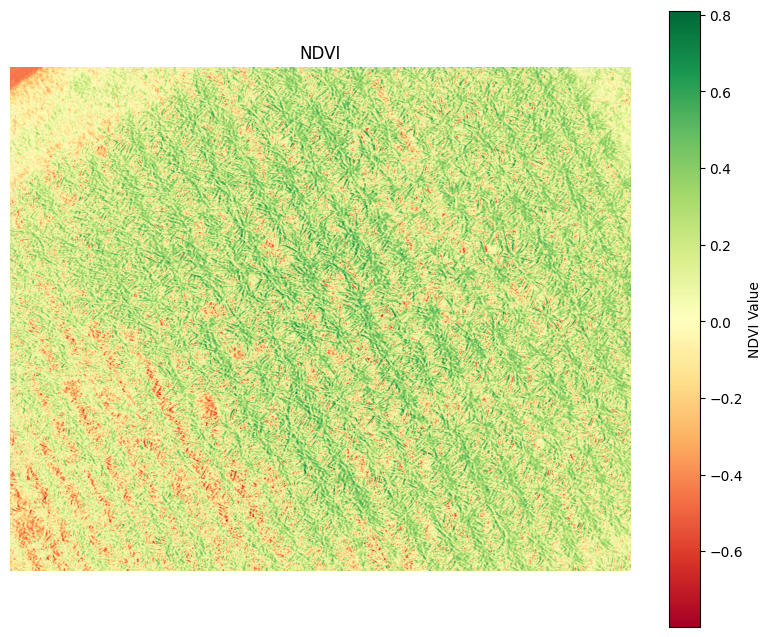

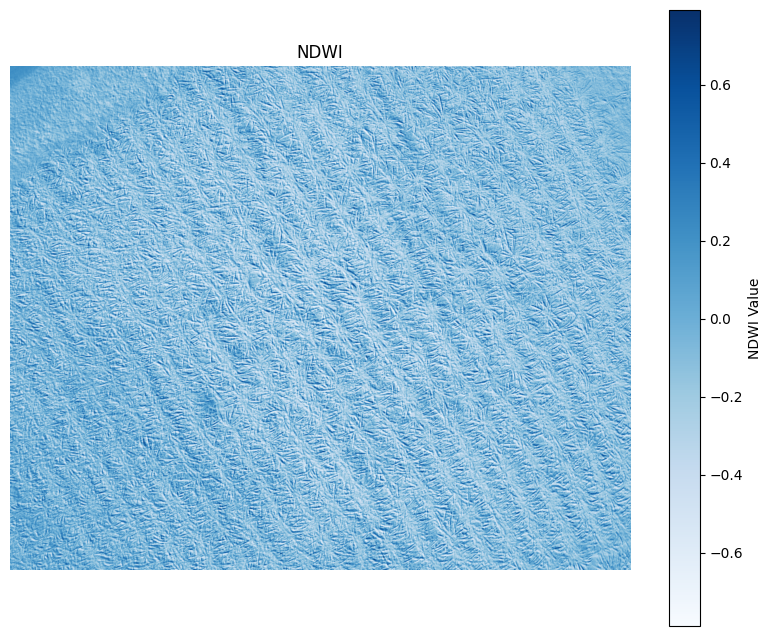

In [5]:
multispectral_image_path = Path('../data/MULTISPECTRAL/ripening/ripening_101FPLAN_30.tif')

# Open the multispectral image
with rasterio.open(multispectral_image_path) as src:
    print(f"Number of bands: {src.count}")
    print(f"Image dimensions: {src.width} x {src.height}")

    # Read the required bands
    red_band = src.read(3)  # Assume RED is Band 3
    nir_band = src.read(4)  # Assume NIR is Band 4
    green_band = src.read(2)  # Assume GREEN is Band 2

    # Ensure bands are float32 for division operations
    red_band = red_band.astype(np.float32)
    nir_band = nir_band.astype(np.float32)
    green_band = green_band.astype(np.float32)

    # Calculate NDVI
    ndvi = (nir_band - red_band) / (nir_band + red_band + 1e-6)  # Add small value to avoid division by zero

    # Calculate NDWI
    ndwi = (green_band - nir_band) / (green_band + nir_band + 1e-6)

# Preview NDVI
plt.figure(figsize=(10, 8))
plt.title("NDVI")
plt.imshow(ndvi, cmap='RdYlGn')  # Vegetation in green
plt.colorbar(label="NDVI Value")
plt.axis("off")
plt.show()

# Preview NDWI
plt.figure(figsize=(10, 8))
plt.title("NDWI")
plt.imshow(ndwi, cmap='Blues')  # Water in blue
plt.colorbar(label="NDWI Value")
plt.axis("off")
plt.show()